In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape

(8807, 12)

SPLIT DATA FIRSTLY

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


terdapat missing value di director, cast, country, date_added, rating dan duration

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Null tidak apa, namun kita isi dengan Blank Space

In [7]:
df.fillna('', inplace=True)  # replace all NaNs with blank strings

In [8]:
df['combined_features'] = (
    (df['title'] + ' ') * 3 +
    (df['director'] + ' ') +
    (df['cast'] + ' ') +
    (df['listed_in'] + ' ') * 2 +
    (df['description'] + ' ') +
    (df['country'] + ' ') +
    (df['rating'] + ' ')
)

df['combined_features'] = df['combined_features'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,combined_features
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",dick johnson is dead dick johnson is dead dick...
1,s2,TV Show,Blood & Water,,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",blood water blood water blood water ama qa...
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,ganglands ganglands ganglands julien leclercq ...
3,s4,TV Show,Jailbirds New Orleans,,,,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",jailbirds new orleans jailbirds new orleans ja...
4,s5,TV Show,Kota Factory,,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,kota factory kota factory kota factory mayur ...


This way:

A missing director or cast just contributes nothing, instead of causing errors.

TF-IDF will treat it as a missing token — which is exactly what you want.

In [10]:
for i in df.columns:
   print(f"{df[i].value_counts()}\n")

show_id
s8807    1
s1       1
s2       1
s3       1
s4       1
        ..
s12      1
s11      1
s10      1
s9       1
s8       1
Name: count, Length: 8807, dtype: int64

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

title
Zubaan                                 1
Dick Johnson Is Dead                   1
Blood & Water                          1
Ganglands                              1
Jailbirds New Orleans                  1
                                      ..
Bangkok Breaking                       1
Vendetta: Truth, Lies and The Mafia    1
The Starling                           1
The Great British Baking Show          1
Sankofa                                1
Name: count, Length: 8807, dtype: int64

director
                                          2634
Rajiv Chilaka                               19
Raúl Campos, Jan Suter                      18
Suhas Kadav                                 16
Marcus Raboy                                16
                        

terdapat beberapa outlier seperti adanya:
- '74 min', '84 min', '66 min' pada column rating

In [11]:
invalid_ratings = ['74 min', '84 min', '66 min']
train_df = df.drop(df[df['rating'].isin(invalid_ratings)].index)

In [12]:
# ubah date_added ke datetime format
df['date_added'] = pd.to_datetime(df['date_added'], format='%B %d, %Y', errors='coerce')

In [13]:
# Step 1: Separate shows
df_shows = df[df['duration'].str.contains('season', case=False, na=False)].copy()

# Step 2: Keep shows as-is (no outlier removal needed)
df_shows_clean = df_shows.copy()

# Movies have 'min' in the duration
df_movies = df[df['duration'].str.contains('min', case=False, na=False)].copy()

# Step 2: Convert durations to numeric values
# For movies: extract number of minutes
df_movies['duration_min'] = df_movies['duration'].str.extract('(\d+)').astype(int)

<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\rayha\AppData\Local\Temp\ipykernel_29452\344211715.py:12: SyntaxWarning: invalid escape sequence '\d'
  df_movies['duration_min'] = df_movies['duration'].str.extract('(\d+)').astype(int)


In [14]:
# applying IQR method to find outliers in movies
Q1 = df_movies['duration_min'].quantile(0.25)
Q3 = df_movies['duration_min'].quantile(0.75)
IQR = Q3 - Q1
upper_bound_mov = Q3 + (1.5 * IQR)
lower_bound_mov = Q1 - (1.5 * IQR)
# Filter out outliers
outliers_movies = df_movies[(df_movies['duration_min'] < lower_bound_mov) | (df_movies['duration_min'] > upper_bound_mov)]
# See how many outliers were found
print("Total movie outliers found:", len(outliers_movies))

Total movie outliers found: 450


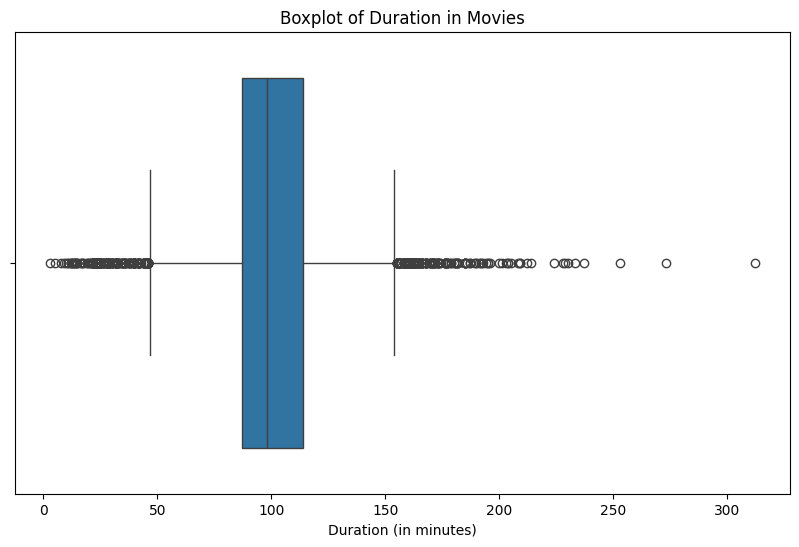

In [15]:
import seaborn as sns
# creating boxplot to visualize outliers in movies
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration_min', data=df_movies)
plt.title('Boxplot of Duration in Movies')
plt.xlabel('Duration (in minutes)')
plt.show()

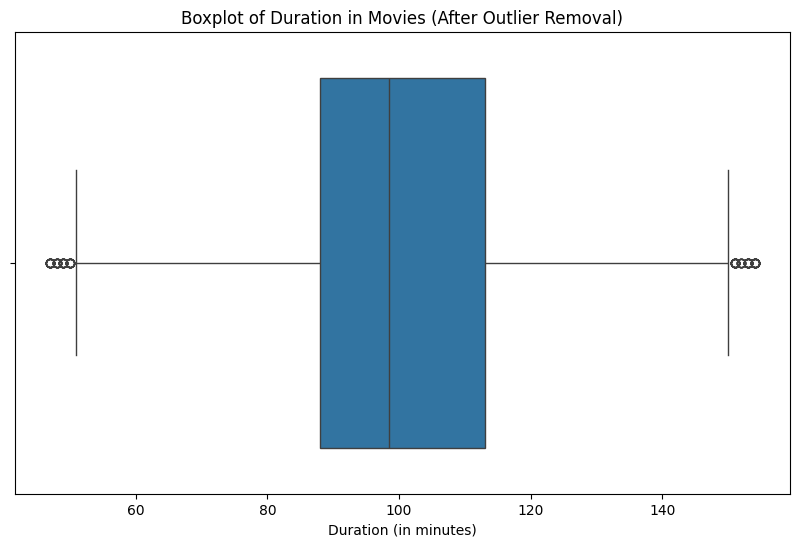

In [16]:
# remove outliers from the movies dataset
df_movies_clean = df_movies[
    (df_movies['duration_min'] > lower_bound_mov) & 
    (df_movies['duration_min'] < upper_bound_mov)
]

# creating boxplot after removing outliers in movies
plt.figure(figsize=(10, 6))
sns.boxplot(x='duration_min', data=df_movies_clean)
plt.title('Boxplot of Duration in Movies (After Outlier Removal)')
plt.xlabel('Duration (in minutes)')
plt.show()

In [17]:
# Merge cleaned movies and shows back into one DataFrame
df_cleaned = pd.concat([df_movies_clean, df_shows_clean], ignore_index=True)

# Replace the original df (optional, if you want to keep only cleaned data)
df = df_cleaned.copy()

In [18]:
df.shape

(8354, 14)

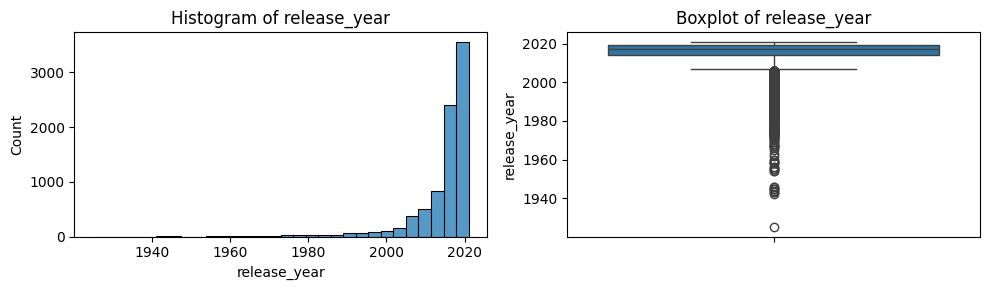

release_year - Skewness: -3.4767927039709687
release_year - Kurtosis: 16.99011780506792


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make sure 'release_year' is numeric or datetime - here we assume it's numeric (e.g., year)
plt.figure(figsize=(10, 3))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['release_year'], bins=30)
plt.title('Histogram of release_year')

# Boxplot
plt.subplot(1, 2, 2)
sns.boxplot(y=df['release_year'])
plt.title('Boxplot of release_year')

plt.tight_layout()
plt.show()

# Optional: Print skewness and kurtosis
print(f'release_year - Skewness: {df["release_year"].skew()}')
print(f'release_year - Kurtosis: {df["release_year"].kurt()}')

Seperti Outliers, namun masih masuk akal karena memang banyak movies yang di produce pada Tahun 1940an - 2000.

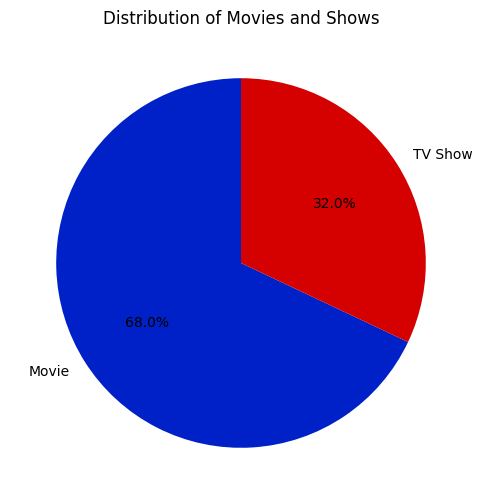

In [20]:
# Generating a pie chart to visualize the proportion of Movies and TV Shows in the dataset
plt.figure(figsize=(8, 6))
df['type'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["#0021c7","#d50000"])
plt.title('Distribution of Movies and Shows')
plt.ylabel('')
plt.show()

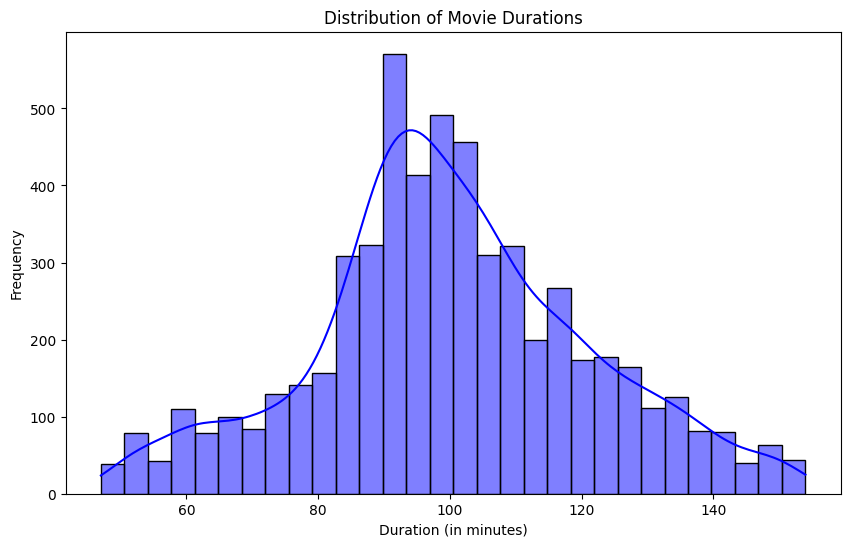

In [21]:
# Visualizing the distribution of movie durations using a histogram and KDE plot -->
plt.figure(figsize=(10, 6))
sns.histplot(df['duration_min'], bins=30, kde=True, color='blue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (in minutes)')
plt.ylabel('Frequency')
plt.show()

C:\Users\rayha\AppData\Local\Temp\ipykernel_29452\4194009988.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')


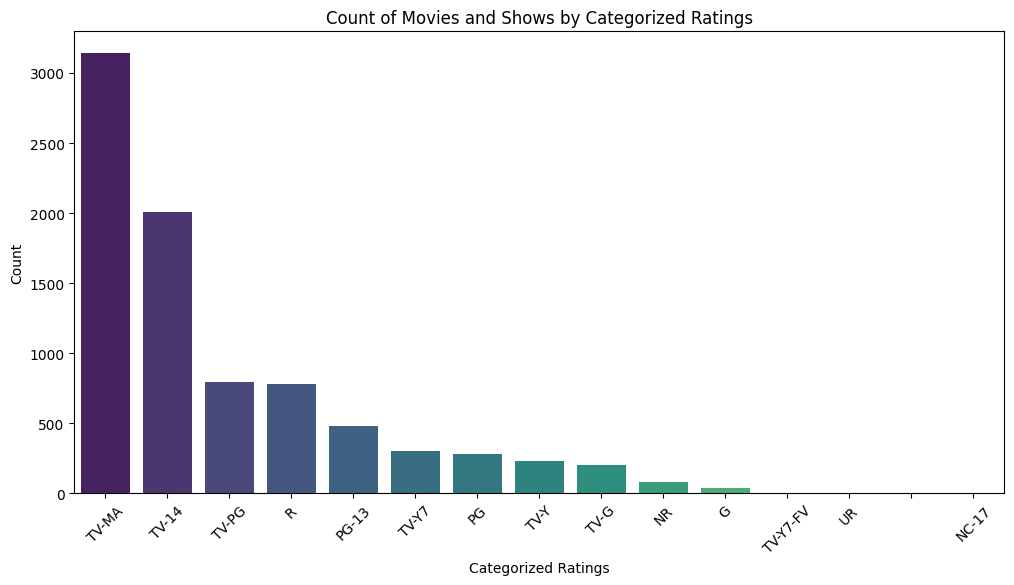

In [22]:
# Plotting the bar chart for categorized ratings
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title('Count of Movies and Shows by Categorized Ratings')
plt.xlabel('Categorized Ratings')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Preprocessing and Modeling

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Apply to your combined features
tfidf_matrix = vectorizer.fit_transform(df['combined_features'])

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [25]:
# Reset index in case it isn't sequential
df = df.reset_index()

# Create mapping from title to index
title_to_index = pd.Series(df.index, index=df['title'].str.lower())

In [26]:
def get_recommendations(title, cosine_sim=cosine_sim, top_n=10):
    title = title.lower()
    idx = title_to_index.get(title)

    if idx is None:
        return f"'{title}' not found in dataset."

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get indices of top_n most similar (excluding itself at index 0)
    sim_scores = sim_scores[1:top_n+1]
    movie_indices = [i[0] for i in sim_scores]

    return df['title'].iloc[movie_indices]

In [27]:
get_recommendations("Naruto")

4731                      Naruto Shippuden : Blood Prison
28                      Naruto Shippûden the Movie: Bonds
27               Naruto Shippuden the Movie: Blood Prison
34      Naruto the Movie: Ninja Clash in the Land of Snow
30                            Naruto Shippuden: The Movie
29           Naruto Shippûden the Movie: The Will of Fire
32       Naruto the Movie 2: Legend of the Stone of Gelel
33      Naruto the Movie 3: Guardians of the Crescent ...
31            Naruto Shippuden: The Movie: The Lost Tower
6206                              Marvel Anime: Wolverine
Name: title, dtype: object

In [28]:
get_recommendations("Stranger Things")

7538      Beyond Stranger Things
6837               Little Things
6708                THE STRANGER
6416                    Stranger
5885    Bureau of Magical Things
4858            Perfect Stranger
6132                  The Sinner
6215          Tiny Pretty Things
6448        The Umbrella Academy
6794                 Nightflyers
Name: title, dtype: object